# PMI tables

In [1]:
import time
import collections
import pickle
import numpy as np
import pandas as pd
from math import log
import matplotlib.pyplot as plt

In [2]:
def save_object(obj, filename):
    with open(filename, 'wb') as outfile:  
        pickle.dump(obj, outfile, pickle.HIGHEST_PROTOCOL)

In [10]:
class PMICalculator:
    
    def __init__(self, counter1, counter2, n1, n2):
        self.counter1 = counter1
        self.counter2 = counter2
        self.n1 = n1
        self.n2 = n2
        self.lpc1 = log(n1 / (n1 + n2))

    def pmi(self, word):
        try:
            return (log(self.counter1[word]) - 
            self.lpc1 -
            log(self.counter1[word] + self.counter2[word]))
        except ValueError:
            return 0

In [33]:
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)
    return (min_val, max_val)

In [5]:
# Load male_bigrams_master:
with open('data/bigrams/male_bigrams_master.pkl', 'rb') as infile:
    male_bigrams = pickle.load(infile)
for k in set(k for k,v in male_bigrams.items() if v < 10):
    del male_bigrams[k]

In [6]:
# Load female_bigrams_master:
with open('data/bigrams/female_bigrams_master.pkl', 'rb') as infile:
    female_bigrams = pickle.load(infile)
for k in set(k for k,v in female_bigrams.items() if v < 10):
    del female_bigrams[k]

In [7]:
all_bigrams = male_bigrams + female_bigrams

# We remove all tokens appearing fewer than 500 times for this analysis
for k in set(k for k,v in all_bigrams.items() if v < 500):
    del all_bigrams[k]

In [8]:
# Load the unigram counters (all categories)
with open('data/female_counter.pkl', 'rb') as infile:
    female_counter = pickle.load(infile)
with open('data/male_counter.pkl', 'rb') as infile:
    male_counter = pickle.load(infile)
for k in set(k for k,v in male_counter.items() if v < 10):
    del male_counter[k]
for k in set(k for k,v in female_counter.items() if v < 10):
    del female_counter[k]

In [9]:
all_unigrams = male_counter + female_counter

# We remove all tokens appearing fewer than 500 times for this analysis
for k in set(k for k,v in all_unigrams.items() if v < 500):
    del all_unigrams[k]

In [10]:
pc2 = PMICalculator(female_bigrams, male_bigrams, 130576, 718413)

bigrams_with_pmi = [(p[0], p[1], pc2.pmi(p[0])) for p in list(all_bigrams.items())]
bigrams_with_pmi.sort(key = lambda x: x[-1])

In [9]:
# Women
women_top_pmi = bigrams_with_pmi[-2000:]
women_top_pmi[-35:]

[(('she', 'beat'), 1136, 1.872090797081209),
 (('soviet', 'female'), 523, 1.872090797081209),
 (('her', 'teammates'), 569, 1.872090797081209),
 (('relay', 'women'), 569, 1.872090797081209),
 (('cup', 'women'), 982, 1.872090797081209),
 (('com', 'sewtatour'), 669, 1.872090797081209),
 (('romantic', 'times'), 553, 1.872090797081209),
 (('name', 'linda'), 616, 1.872090797081209),
 (('wnba', 'draft'), 1177, 1.872090797081209),
 (('chinese', 'female'), 1151, 1.872090797081209),
 (('expatriate', 'women'), 982, 1.872090797081209),
 (('anna', 'sui'), 613, 1.872090797081209),
 (('women', 'historians'), 723, 1.872090797081209),
 (('titleholder', 'name'), 1074, 1.872090797081209),
 (('ladies', 'european'), 1309, 1.872090797081209),
 (('virginia', 'slims'), 683, 1.872090797081209),
 (('sportswomen', 'category'), 561, 1.872090797081209),
 (('teen', 'usa'), 1214, 1.872090797081209),
 (('futures', 'tour'), 704, 1.872090797081209),
 (('women', 'basketball'), 553, 1.872090797081209),
 (('female', 'fenc

In [10]:
# Men
men_top_pmi = bigrams_with_pmi[:2000]
men_top_pmi[:30]

[(('season', 'he'), 92920, -7.169508117004767),
 (('c', 'season'), 89374, -7.130599021242945),
 (('nhl', 'season'), 107596, -6.941459231976644),
 (('english', 'male'), 51900, -6.5870879992744005),
 (('class', 'cricket'), 40502, -6.3391205647118145),
 (('nfl', 'draft'), 41359, -6.273047884071101),
 (('town', 'f'), 111024, -6.248903314591642),
 (('championships', 'men'), 43722, -6.248566532355593),
 (('league', 'one'), 39728, -6.078663381051481),
 (('port', 'vale'), 30684, -6.061510555199607),
 (('male', 'television'), 38810, -6.055285097666484),
 (('county', 'f'), 26149, -5.996890337768831),
 (('i', 'men'), 31265, -5.99325709313219),
 (('pro', 'bowl'), 30146, -5.956810076501267),
 (('football', 'season'), 52560, -5.906577402718968),
 (('win', 'small'), 25146, -5.862468047273548),
 (('he', 'finished'), 69450, -5.842284346616135),
 (('player', 'he'), 27615, -5.789074227792543),
 (('politician', 'he'), 20515, -5.754235714801033),
 (('american', 'male'), 181008, -5.745569341352899),
 (('cat

In [11]:
pc1 = PMICalculator(female_counter, male_counter, 130576, 718413)

unigrams_with_pmi = [(p[0], p[1], pc1.pmi(p[0])) for p in list(all_unigrams.items())]
unigrams_with_pmi.sort(key = lambda x: x[-1])

In [12]:
all_tokens_pmi = [(x[0], x[2]) for x in bigrams_with_pmi] + [(x[0], x[2]) for x in unigrams_with_pmi]

In [6]:
# save_object(all_tokens_pmi, 'data/all_tokens_pmi.pkl')
# Load all_tokens_pmi:
with open('data/all_tokens_pmi.pkl', 'rb') as infile:
    all_tokens_pmi = pickle.load(infile)

In [12]:
men_top_pmi.extend(unigrams_with_pmi[:2000])
men_top_pmi.sort(key = lambda x: x[-1])
men_top_pmi = men_top_pmi[:2000]
men_top_pmi[:25]

[(('season', 'he'), 92920, -7.169508117004767),
 (('c', 'season'), 89374, -7.130599021242945),
 (('nhl', 'season'), 107596, -6.941459231976644),
 (('english', 'male'), 51900, -6.5870879992744005),
 (('class', 'cricket'), 40502, -6.3391205647118145),
 (('nfl', 'draft'), 41359, -6.273047884071101),
 (('town', 'f'), 111024, -6.248903314591642),
 (('championships', 'men'), 43722, -6.248566532355593),
 (('league', 'one'), 39728, -6.078663381051481),
 (('port', 'vale'), 30684, -6.061510555199607),
 (('male', 'television'), 38810, -6.055285097666484),
 (('county', 'f'), 26149, -5.996890337768831),
 (('i', 'men'), 31265, -5.99325709313219),
 (('pro', 'bowl'), 30146, -5.956810076501267),
 (('football', 'season'), 52560, -5.906577402718968),
 (('win', 'small'), 25146, -5.862468047273548),
 (('he', 'finished'), 69450, -5.842284346616135),
 (('player', 'he'), 27615, -5.789074227792543),
 (('politician', 'he'), 20515, -5.754235714801033),
 (('american', 'male'), 181008, -5.745569341352899),
 ('touc

In [13]:
women_top_pmi.extend(unigrams_with_pmi[-2000:])
women_top_pmi.sort(key = lambda x: x[-1], reverse=True)
women_top_pmi = women_top_pmi[:2000]

In [14]:
women_top_pmi[:50]

[(('she', 'achieved'), 1092, 1.872090797081209),
 (('her', 'greatest'), 730, 1.872090797081209),
 (('1976', 'she'), 1316, 1.872090797081209),
 (('she', 'teamed'), 641, 1.872090797081209),
 (('illustrated', 'swimsuit'), 576, 1.872090797081209),
 (('sexiest', 'women'), 972, 1.872090797081209),
 (('age', 'she'), 1244, 1.872090797081209),
 (('1971', 'she'), 1045, 1.872090797081209),
 (('her', 'post'), 682, 1.872090797081209),
 (('women', 'short'), 1297, 1.872090797081209),
 (('nurses', 'category'), 758, 1.872090797081209),
 (('19', 'she'), 504, 1.872090797081209),
 (('her', 'poems'), 1245, 1.872090797081209),
 (('completing', 'her'), 1309, 1.872090797081209),
 (('anne', 'category'), 857, 1.872090797081209),
 (('her', 'popularity'), 744, 1.872090797081209),
 (('she', 'created'), 2290, 1.872090797081209),
 (('she', 'majored'), 713, 1.872090797081209),
 (('landed', 'her'), 504, 1.872090797081209),
 (('featured', 'her'), 553, 1.872090797081209),
 (('her', 'talent'), 798, 1.872090797081209),
 (

In [15]:
women_top_pmi.reverse()
master_pmi = men_top_pmi + women_top_pmi

In [7]:
# Load category-specific bigram counters:
with open('data/bigrams/female_sports.pkl', 'rb') as infile:
    female_sports = pickle.load(infile)
with open('data/bigrams/female_monarch.pkl', 'rb') as infile:
    female_monarch = pickle.load(infile)
with open('data/bigrams/female_scientist.pkl', 'rb') as infile:
    female_scientist = pickle.load(infile)
with open('data/bigrams/female_artists.pkl', 'rb') as infile:
    female_artists = pickle.load(infile)
with open('data/bigrams/female_programming.pkl', 'rb') as infile:
    female_programming = pickle.load(infile)
with open('data/bigrams/male_programming.pkl', 'rb') as infile:
    male_programming = pickle.load(infile)
with open('data/bigrams/male_scientist.pkl', 'rb') as infile:
    male_scientist = pickle.load(infile)
with open('data/bigrams/male_sports.pkl', 'rb') as infile:
    male_sports = pickle.load(infile)
with open('data/bigrams/male_artists.pkl', 'rb') as infile:
    male_artists = pickle.load(infile)
with open('data/bigrams/male_monarch.pkl', 'rb') as infile:
    male_monarch = pickle.load(infile)

In [8]:
# Load category-specific unigram counters
with open('data/bigrams/female_sports_u.pkl', 'rb') as infile:
    female_sports_u = pickle.load(infile)
with open('data/bigrams/female_monarch_u.pkl', 'rb') as infile:
    female_monarch_u = pickle.load(infile)
with open('data/bigrams/female_scientist_u.pkl', 'rb') as infile:
    female_scientist_u = pickle.load(infile)
with open('data/bigrams/female_artists_u.pkl', 'rb') as infile:
    female_artists_u = pickle.load(infile)
with open('data/bigrams/female_programming_u.pkl', 'rb') as infile:
    female_programming_u = pickle.load(infile)
with open('data/bigrams/male_programming_u.pkl', 'rb') as infile:
    male_programming_u = pickle.load(infile)
with open('data/bigrams/male_scientist_u.pkl', 'rb') as infile:
    male_scientist_u = pickle.load(infile)
with open('data/bigrams/male_sports_u.pkl', 'rb') as infile:
    male_sports_u = pickle.load(infile)
with open('data/bigrams/male_artists_u.pkl', 'rb') as infile:
    male_artists_u = pickle.load(infile)
with open('data/bigrams/male_monarch_u.pkl', 'rb') as infile:
    male_monarch_u = pickle.load(infile)

In [11]:
pc_sports = PMICalculator(female_sports + female_sports_u, male_sports + male_sports_u, 5145, 17528)
pc_scientist = PMICalculator(female_scientist + female_scientist_u, male_scientist + male_scientist_u, 1946, 8438)

In [22]:
pc_artists = PMICalculator(female_artists + female_artists_u, male_artists + male_artists_u, 8484, 21781)
pc_programming = PMICalculator(female_programming + female_programming_u, male_programming + male_programming_u, 52, 995)

In [23]:
pc_programming.pmi(('first', 'woman'))

3.002440492289109

In [24]:
pc_programming.pmi(('feminist'))

2.309293311729164

In [25]:
pc_programming.pmi(('married'))

0.7688482707820157

In [26]:
pc_programming.pmi(('family'))

0.5422264550914813

In [18]:
pc_monarch.pmi(('first', 'woman'))

1.4587582620791872

In [19]:
pc_monarch.pmi(('feminist'))

1.3052452153794434

In [20]:
pc_monarch.pmi(('married'))

0.6198305167052709

In [21]:
pc_monarch.pmi(('family'))

0.542421352033104

In [39]:
pc_artists.pmi(('first','person'))

0.1664861693851174

In [38]:
pc_scientist.pmi(('first','person'))

0.30688794809018294

In [35]:
pc_monarch.pmi(('first','person'))

-0.01790269005587497

In [36]:
pc_sports.pmi(('first','person'))

-0.48483668079602094

In [37]:
pc_programming.pmi(('first','person'))

-0.7587596234044529

In [38]:
all_sports = female_sports + female_sports_u + male_sports + male_sports_u
for k in set(k for k,v in all_sports.items() if v < 200):
    del all_sports[k]
sports_with_pmi = [(p[0], pc_sports.pmi(p[0])) for p in list(all_sports.items())]
minmax([i[1] for i in sports_with_pmi])

(-6.985273607088316, 1.483149419958493)

In [39]:
all_monarch = female_monarch + female_monarch_u + male_monarch + male_monarch_u
for k in set(k for k,v in all_monarch.items() if v < 200):
    del all_monarch[k]
monarch_with_pmi = [(p[0], pc_monarch.pmi(p[0])) for p in list(all_monarch.items())]
minmax([i[1] for i in monarch_with_pmi])

(-7.310186473808795, 1.5990677570825893)

In [40]:
all_programming = female_programming + female_programming_u + male_programming + male_programming_u
for k in set(k for k,v in all_programming.items() if v < 200):
    del all_programming[k]
programming_with_pmi = [(p[0], pc_programming.pmi(p[0])) for p in list(all_programming.items())]
minmax([i[1] for i in programming_with_pmi])

(-3.1001181023244597, 2.9792375952094456)

In [41]:
all_scientist = female_scientist + female_scientist_u + male_scientist + male_scientist_u
for k in set(k for k,v in all_scientist.items() if v < 200):
    del all_scientist[k]
scientist_with_pmi = [(p[0], pc_scientist.pmi(p[0])) for p in list(all_scientist.items())]
minmax([i[1] for i in scientist_with_pmi])

(-5.259907033730637, 1.6744901761979216)

In [42]:
all_artists = female_artists + female_artists_u + male_artists + male_artists_u
for k in set(k for k,v in all_artists.items() if v < 200):
    del all_artists[k]
artists_with_pmi = [(p[0], pc_artists.pmi(p[0])) for p in list(all_artists.items())]
minmax([i[1] for i in artists_with_pmi])

(-6.247340065028609, 1.2718098926412154)

In [29]:
# save_object(master_pmi, 'data/master_pmi.pkl')

In [4]:
# Load master_pmi:
with open('data/master_pmi.pkl', 'rb') as infile:
    master_pmi = pickle.load(infile)

In [8]:
new_master_pmi = [(x[0], x[2]) for x in master_pmi]
df = pd.DataFrame(new_master_pmi, columns=["Token", "PMI - All bios"])
df["PMI - Sports"] = [pc_sports.pmi(i[0]) for i in master_pmi]
df.head()

,Token,PMI - All bios,PMI - Sports
0,"(season, he)",-7.169508,0.0
1,"(c, season)",-7.130599,0.0
2,"(nhl, season)",-6.941459,0.0
3,"(english, male)",-6.587088,0.0
4,"(class, cricket)",-6.339121,0.0


In [9]:
df["PMI - Scientists"] = [pc_scientist.pmi(i[0]) for i in master_pmi]

In [11]:
df["PMI - Artists"] = [pc_artists.pmi(i[0]) for i in master_pmi]
df["PMI - Programming"] = [pc_programming.pmi(i[0]) for i in master_pmi]

In [2]:
# Load master_pmi:
with open('data/df.pkl', 'rb') as infile:
    df = pickle.load(infile)

In [4]:
df.head(50)

,Token,PMI - All bios,PMI - Sports,PMI - Scientists,PMI - Artists,PMI - Programming,PMI - Monarch
0,"(season, he)",-7.169508,0.000000,0.000000,-3.419538,0.0,-4.606266
1,"(c, season)",-7.130599,0.000000,0.000000,-1.436240,0.0,0.000000
2,"(nhl, season)",-6.941459,0.000000,0.000000,-2.640213,0.0,0.000000
3,"(english, male)",-6.587088,0.000000,0.000000,0.000000,0.0,-3.267669
4,"(class, cricket)",-6.339121,0.000000,0.000000,0.000000,0.0,0.000000
5,"(nfl, draft)",-6.273048,0.000000,0.000000,0.000000,0.0,0.000000
6,"(town, f)",-6.248903,-6.985274,0.000000,0.000000,0.0,0.000000
7,"(championships, men)",-6.248567,-6.464293,0.000000,0.000000,0.0,-2.339906
8,"(league, one)",-6.078663,-6.411541,0.000000,-1.126085,0.0,0.000000
9,"(port, vale)",-6.061511,0.000000,0.000000,0.000000,0.0,0.000000


In [5]:
df.tail(50)

,Token,PMI - All bios,PMI - Sports,PMI - Scientists,PMI - Artists,PMI - Programming,PMI - Monarch
3950,"(final, she)",1.872091,1.483149,0.00000,1.271810,0.000000,1.611338
3951,"(she, collaborated)",1.872091,1.483149,1.67449,1.258064,0.000000,1.611338
3952,"(stage, she)",1.872091,1.483149,1.67449,1.271810,0.000000,1.611338
3953,"(her, degree)",1.872091,1.483149,1.67449,1.271810,0.000000,1.611338
3954,"(female, actor)",1.872091,0.000000,1.67449,1.271810,0.000000,1.611338
3955,"(she, reprised)",1.872091,0.000000,0.00000,1.271810,0.000000,1.611338
3956,"(producer, she)",1.872091,0.000000,1.67449,1.271810,0.000000,1.611338
3957,"(established, her)",1.872091,1.483149,1.67449,1.271810,0.000000,1.611338
3958,"(women, photographers)",1.872091,0.000000,1.67449,1.271810,0.000000,1.611338
3959,"(guest, actress)",1.872091,1.483149,0.00000,1.271810,0.000000,1.611338


In [17]:
pc_monarch = PMICalculator(female_monarch + female_monarch_u, male_monarch + male_monarch_u, 2524, 10120)

In [15]:
df["PMI - Monarch"] = [pc_monarch.pmi(i[0]) for i in master_pmi]

In [17]:
df.head()

,Token,PMI - All bios,PMI - Sports,PMI - Scientists,PMI - Artists,PMI - Programming,PMI - Monarch
0,"(season, he)",-7.169508,0.0,0.0,-3.419538,0.0,-4.606266
1,"(c, season)",-7.130599,0.0,0.0,-1.436240,0.0,0.000000
2,"(nhl, season)",-6.941459,0.0,0.0,-2.640213,0.0,0.000000
3,"(english, male)",-6.587088,0.0,0.0,0.000000,0.0,-3.267669
4,"(class, cricket)",-6.339121,0.0,0.0,0.000000,0.0,0.000000


In [18]:
# save_object(df, 'data/df.pkl')

In [13]:
len(all_tokens_pmi)

272367

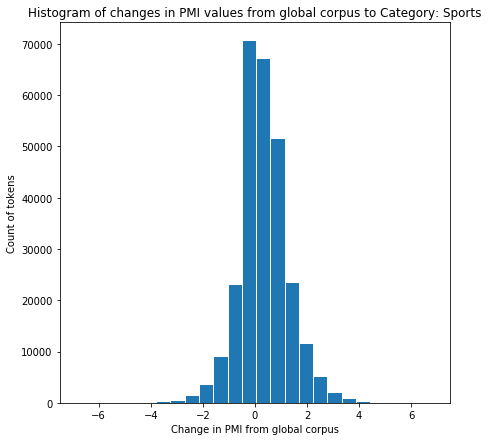

In [20]:
x = [pc_sports.pmi(i[0]) - i[1] for i in all_tokens_pmi]
# x = df['PMI - Sports'] - df['PMI - All bios']
plt.figure(figsize=(7,7))
plt.hist(x, bins=25, align='mid', edgecolor='white')
plt.xlim(xmin=-7.5, xmax = 7.5)
# plt.ylim(ymax = 1550)
plt.xlabel('Change in PMI from global corpus')
plt.ylabel('Count of tokens')
plt.title("Histogram of changes in PMI values from global corpus to Category: Sports")
plt.show()

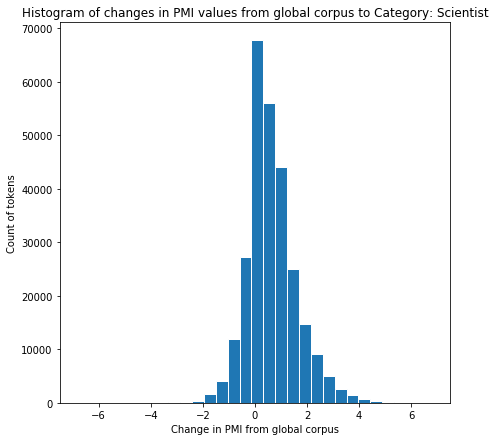

In [21]:
y = [pc_scientist.pmi(i[0]) - i[1] for i in all_tokens_pmi]

# y = df['PMI - Scientists'] - df['PMI - All bios']
plt.figure(figsize=(7,7))
plt.hist(y, bins=25, align='mid', edgecolor='white')
plt.xlim(xmin=-7.5, xmax = 7.5)
# plt.ylim(ymax = 1550)
plt.xlabel('Change in PMI from global corpus')
plt.ylabel('Count of tokens')
plt.title("Histogram of changes in PMI values from global corpus to Category: Scientist")
plt.show()

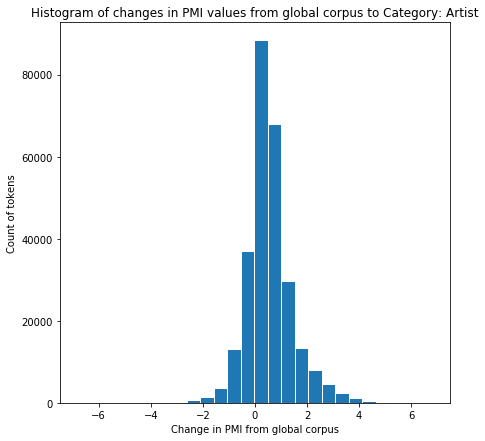

In [22]:
y = [pc_artists.pmi(i[0]) - i[1] for i in all_tokens_pmi]
plt.figure(figsize=(7,7))
plt.hist(y, bins=25, align='mid', edgecolor='white')
plt.xlim(xmin=-7.5, xmax = 7.5)
plt.xlabel('Change in PMI from global corpus')
plt.ylabel('Count of tokens')
plt.title("Histogram of changes in PMI values from global corpus to Category: Artist")
plt.show()

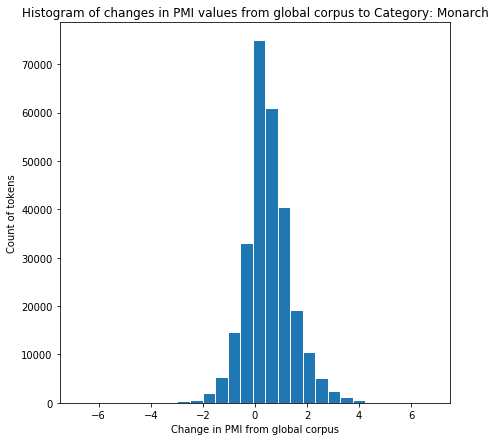

In [23]:
y = [pc_monarch.pmi(i[0]) - i[1] for i in all_tokens_pmi]
plt.figure(figsize=(7,7))
plt.hist(y, bins=25, align='mid', edgecolor='white')
plt.xlim(xmin=-7.5, xmax = 7.5)
plt.xlabel('Change in PMI from global corpus')
plt.ylabel('Count of tokens')
plt.title("Histogram of changes in PMI values from global corpus to Category: Monarch")
plt.show()

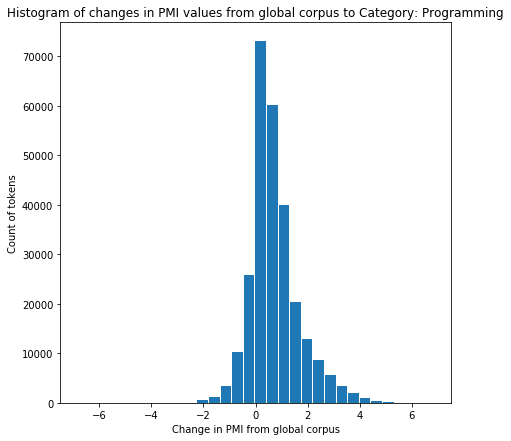

In [24]:
y = [pc_programming.pmi(i[0]) - i[1] for i in all_tokens_pmi]
plt.figure(figsize=(7,7))
plt.hist(y, bins=25, align='mid', edgecolor='white')
plt.xlim(xmin=-7.5, xmax = 7.5)
plt.xlabel('Change in PMI from global corpus')
plt.ylabel('Count of tokens')
plt.title("Histogram of changes in PMI values from global corpus to Category: Programming")
plt.show()

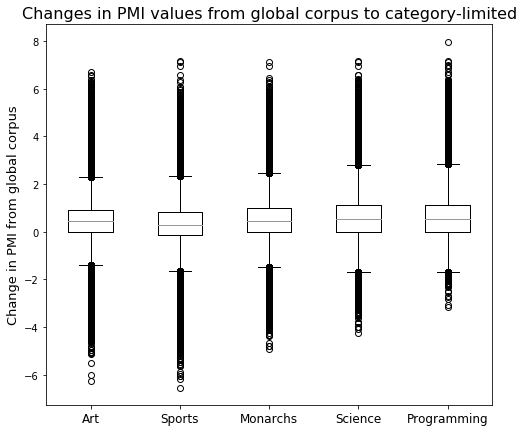

In [32]:
data = [[pc_artists.pmi(i[0]) - i[1] for i in all_tokens_pmi],
        [pc_sports.pmi(i[0]) - i[1] for i in all_tokens_pmi],
        [pc_monarch.pmi(i[0]) - i[1] for i in all_tokens_pmi],
        [pc_scientist.pmi(i[0]) - i[1] for i in all_tokens_pmi],
        [pc_programming.pmi(i[0]) - i[1] for i in all_tokens_pmi]
       ]

plt.figure(figsize=(8,7))
plt.boxplot(data)
plt.xticks([1,2,3,4,5], ['Art', 'Sports', 'Monarchs', 'Science', 'Programming'], fontsize=12)
plt.title("Changes in PMI values from global corpus to category-limited", fontsize=16)
plt.ylabel('Change in PMI from global corpus', fontsize=13)
plt.show()

In [35]:
minmax([i[1] for i in all_tokens_pmi])

(-7.169508117004767, 1.872090797081209)